In [2]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

In [3]:
'''7.47 Gaming and distracted eating, Part I. A group of researchers are interested in the possible effects of
distracting stimuli during eating, such as an increase or decrease in the amount of food consumption. To test
this hypothesis, they monitored food intake for a group of 44 patients who were randomized into two equal
groups. The treatment group ate lunch while playing solitaire, and the control group ate lunch without any
added distractions. Patients in the treatment group ate 52.1 grams of biscuits, with a standard deviation of
45.1 grams, and patients in the control group ate 27.1 grams of biscuits, with a standard deviation of 26.4
grams. Do these data provide convincing evidence that the average food intake (measured in amount of
biscuits consumed) is different for the patients in the treatment group? Assume that conditions for inference
are satisfied.'''
n = 44
n_t = 22
xbar_t = 52.1
s_t = 45.1

n_c = 22
xbar_c = 27.1
s_c = 26.4

sl = .05
dof = n_t - 1 # i need to better understand how to set degrees of freedom.
xbar = xbar_t - xbar_c
x0 = 0
se = np.sqrt((s_t**2/n_t) + (s_c**2/n_c))
t = (xbar-x0) / se
two_t = [t,(t*(-1))]
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score
print(f'''it's an experiment,
we're assuming conditions for inference are satisfied,
because the our p-value of {p:.4f} is smaller than our significance level of {sl}, we reject the null hypothesis and conclude
there's a significant difference in the average biscuit consumption between treatment and control groups.
''')

it's an experiment,
we're assuming conditions for inference are satisfied,
because the our p-value of 0.0358 is smaller than our significance level of 0.05, we reject the null hypothesis and conclude
there's a significant difference in the average biscuit consumption between treatment and control groups.



In [4]:
'''7.48 Gaming and distracted eating, Part II. The researchers from Exercise 7.47 also investigated the effects
of being distracted by a game on how much people eat. The 22 patients in the treatment group who ate
their lunch while playing solitaire were asked to do a serial-order recall of the food lunch items they ate.
The average number of items recalled by the patients in this group was 4. 9, with a standard deviation of
1.8. The average number of items recalled by the patients in the control group (no distraction) was 6.1, with
a standard deviation of 1.8. Do these data provide strong evidence that the average number of food items
recalled by the patients in the treatment and control groups are different?'''

n_t = 22
xbar_t = 4.9
s_t = 1.8

n_c = 22
xbar_c = 6.1
s_c = 1.8

sl = .05
dof = n_t - 1 # i need to better understand how to set degrees of freedom.
xbar = xbar_t - xbar_c
x0 = 0
se = np.sqrt((s_t**2/n_t) + (s_c**2/n_c))
t = (xbar-x0) / se
two_t = [t,(t*(-1))]
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score
print(f'''it's an experiment,
we're assuming conditions for inference are satisfied,
because the our p-value of {p:.4f} is smaller than our significance level of {sl}, we reject the null hypothesis and conclude
there's a significant difference in the average recall of food between treatment and control groups. In other words,
the patients in the treatment group who were playing solitaire ordered less times than the patients who are in control group.
''')

it's an experiment,
we're assuming conditions for inference are satisfied,
because the our p-value of 0.0383 is smaller than our significance level of 0.05, we reject the null hypothesis and conclude
there's a significant difference in the average recall of food between treatment and control groups. In other words,
the patients in the treatment group who were playing solitaire ordered less times than the patients who are in control group.



In [5]:
'''7.49 Sample size and pairing. Determine if the following statement is true or false, and if false, explain
your reasoning: If comparing means of two groups with equal sample sizes, always use a paired test.'''
print('''false. even though the same sample size needed in the paired tests, it does not mean that if we have equal sample sizes
we must conduct paired tests. in paired tests, we look for the special correspondence between each pair of observations.
''')

false. even though the same sample size needed in the paired tests, it does not mean that if we have equal sample sizes
we must conduct paired tests. in paired tests, we look for the special correspondence between each pair of observations.



In [6]:
'''7.50 College credits. A college counselor is interested in estimating how many credits a student typically
enrolls in each semester. The counselor decides to randomly sample 100 students by using the registrar's
database of students. The histogram below shows the distribution of the number of credits taken by these
students. Sample statistics for this distribution are also provided.
(a) What is the point estimate for the average number of credits taken per semester by students at this
college? What about the median?
(b) What is the point estimate for the standard deviation of the number of credits taken per semester by
students at this college? What about the IQR?
(c) Is a load of 16 credits unusually high for this college? What about 18 credits? Explain your reasoning.
(d) The college counselor takes another random sample of 100 students and this time finds a sample mean
of 14.02 units. Should she be surprised that this sample statistic is slightly different than the one from
the original sample? Explain your reasoning.
(e) The sample means given above are point estimates for the mean number of credits taken by all students
at that college. What measures do we use to quantify the variability of this estimate? Compute this
quantity using the data from the original sample.'''

print('''a) point estimate for the average number of credits taken per semester is 13.65
b) standard deviation is 1.91, IQR is 2 points
c) values that are farther than 1.5 x IQR from quartiles are usually considered unusually large or low.
since IQR is 2, 1.5 x 2 = 3 and the Q3 is 16, a value that is unusually large can be over 16+3=19.
d) no, there is always a sampling variability and the difference between two samples doesn't look like
there's something problematic going on.
e) we have to compute the standard error. 1.91 / sqrt(100) = 0.191''')

a) point estimate for the average number of credits taken per semester is 13.65
b) standard deviation is 1.91, IQR is 2 points
c) values that are farther than 1.5 x IQR from quartiles are usually considered unusually large or low.
since IQR is 2, 1.5 x 2 = 3 and the Q3 is 16, a value that is unusually large can be over 16+3=19.
d) no, there is always a sampling variability and the difference between two samples doesn't look like
there's something problematic going on.
e) we have to compute the standard error. 1.91 / sqrt(100) = 0.191


In [7]:
'''7.51 Hen eggs. The distribution of the number of eggs laid by a certain species of hen during their breeding
period has a mean of 35 eggs with a standard deviation of 18.2. Suppose a group of researchers randomly
samples 45 hens of this species, counts the number of eggs laid during their breeding period, and records
the sample mean. They repeat this 1,000 times, and build a distribution of sample means.
(a) What is this distribution called?
(b) Would you expect the shape of this distribution to be symmetric, right skewed, or left skewed? Explain
your reasoning.
(c) Calculate the variability of this distribution and state the appropriate term used to refer to this value.
(d) Suppose the researchers' budget is reduced and they are only able to collect random samples of 10 hens.
The sample mean of the number of eggs is recorded, and we repeat this 1,000 times, and build a new
distribution of sample means. How will the variability of this new distribution compare to the variability
of the original distribution?'''
se = 18.2 / np.sqrt(45)
print(f'''a) sampling distribution.
b) i would expect the shape to be symmetric. since the sample is randomly collected, we should expect the observations 
to be independent and also because sample size is over 30, we can say central limit theorem will apply.
c) standard error is the correct quantification for this case since we're dealing with the samples and sampling distribution.
se = 18.2 / sqrt(45) = {se:.3f} 
d) because we're dealing with a smaller sample size, the variability would be bigger than the original study.''')

a) sampling distribution.
b) i would expect the shape to be symmetric. since the sample is randomly collected, we should expect the observations 
to be independent and also because sample size is over 30, we can say central limit theorem will apply.
c) standard error is the correct quantification for this case since we're dealing with the samples and sampling distribution.
se = 18.2 / sqrt(45) = 2.713 
d) because we're dealing with a smaller sample size, the variability would be bigger than the original study.


CONFIDENCE INTERVAL
standard error = 1.0182, me = 2.7288, dof = 49, t_conf = 2.6800
we're 99% confident that the average true difference in the heights of those 50 young trees measured in 2009 and 2019
is 9.7712 between 15.2288



C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


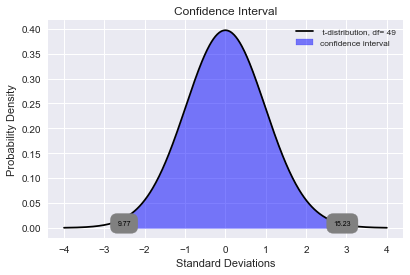

In [8]:
'''7.52 Forest management. Forest rangers wanted to better understand the rate of growth for younger trees
in the park. They took measurements of a random sample of 50 young trees in 2009 and again measured
those same trees in 2019. The data below summarize their measurements, where the heights are in feet:
Construct a 99% confidence interval for the average growth of (what had been) younger trees in the park
over 2009-2019.'''
n = 50
xbar = 12.5
s = 7.2

cl = .99
sl = 1-cl
s1t = sl/2
dof = n-1

# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
s1t = sl / 2
t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = s / np.sqrt(n)
me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
we're {cl:.0%} confident that the average true difference in the heights of those 50 young trees measured in 2009 and 2019
is {lo:.4f} between {hi:.4f}
'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

In [9]:
z_power = stats.norm.ppf(.80) # z score of our practical value of 1% corresponding to 80% power.

se = 0.3569361868109122
statistical power is: 0.8


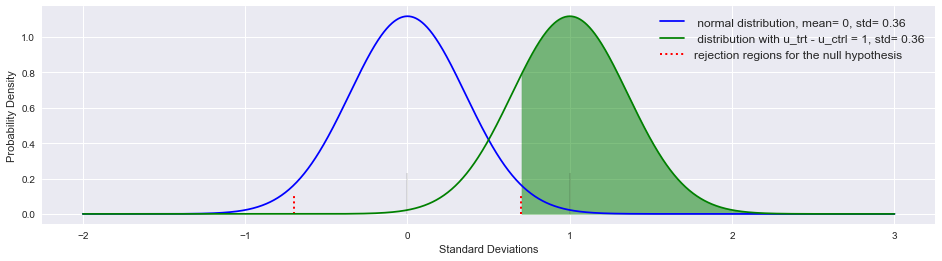

In [31]:
'''7.53 Experiment resizing. At a startup company running a new weather app, an engineering team
generally runs experiments where a random sample of 1% of the app's visitors in the control group and
another 1% were in the treatment group to test each new feature. The team's core goal is to increase a
metric called daily visitors, which is essentially the number of visitors to the app each day. They track
this metric in each experiment arm and as their core experiment metric. In their most recent experiment,
the team tested including a new animation when the app started, and the number of daily visitors in this
experiment stabilized at +1.2% with a 95% confidence interval of (-0.2%, +2.6%). This means if this new
app start animation was launched, the team thinks they might lose as many as 0.2% of daily visitors or
gain as many as 2.6% more daily visitors. Suppose you are consulting as the team's data scientist, and after
discussing with the team, you and they agree that they should run another experiment that is bigger. You
also agree that this new experiment should be able to detect a gain in the daily visitors metric of 1.0% or
more with 80% power. Now they turn to you and ask, "How big of an experiment do we need to run to
ensure we can detect this effect?"
(a) How small must the standard error be if the team is to be able to detect an effect of 1.0% with 80%
power and a significance level of 0.05? You may safely assume the percent change in daily visitors
metric follows a normal distribution.
(b) Consider the first experiment, where the point estimate was +1.2% and the 95% confidence interval was
(-0.2%, +2.6%). If that point estimate followed a normal distribution, what was the standard error of
the estimate?
(c) The ratio of the standard error from part (a) vs the standard error from part (b) should be 1.97. How
much bigger of an experiment is needed to shrink a standard error by a factor of 1.97?
(d) Using your answer from part (c) and that the original experiment was a 1% vs 1% experiment to
recommend an experiment size to the team.'''

z_power = stats.norm.ppf(.80) # z score of our practical value of 1% corresponding to 80% power.
# z95*se + z80*se = 1  // 
se = 1 / (z95 + z_power) 
print(f"se = {se}")
mean_null = 0 # null value
mean_practical = 1 # effect size
z = z95 
me = [se*z95, (se*z95)*(-1)]
means = [mean_null,mean_practical]

fig = plt.figure(figsize=(16,4))
x = np.linspace(-2, 3, 1500)
ax = fig.add_subplot(1,1,1)
y = stats.norm(mean_null, se).pdf(x)
ax.plot(x, y, color='blue',label=f' normal distribution, mean= {mean_null}, std= {se:.2f}'.format(mean=mean_null))

y = stats.norm(mean_practical, se).pdf(x)
ax.plot(x, y, color='green',label=f' distribution with u_trt - u_ctrl = {mean_practical}, std= {se:.2f}'.format(mean=mean_null))
ax.set_ylabel('Probability Density')
ax.set_xlabel('Standard Deviations')
ax.set_title('')
ax.vlines(x=me, ymin=0, ymax=0.1, colors='red', lw=2,linestyles="dotted",label="rejection regions for the null hypothesis")
ax.vlines(x=means, ymin=0, ymax=0.23, colors='black', lw=2,alpha=0.1)
legend = ax.legend(shadow=True,fontsize='large')
ax.fill_between(x, y, color='green', alpha=0.5, where = (x>max(me)))
power = 1 - stats.norm(mean_practical, se).cdf(x=max(me)) # since we're looking for the power for over the bigger rejection region, simply subtracting from 1 will give us the power
print("statistical power is:",power)

In [38]:
'''7.54 Torque on a rusty bolt. Project Farm is a YouTube channel that routinely compares different
products. In one episode, the channel evaluated different options for loosening rusty bolts. Eight options
were evaluated, including a control group where no treatment was given ("none" in the graph), to determine
which was most effective. For all treatments, there were four bolts tested, except for a treatment of heat
with a blow torch, where only two data points were collected. The results are shown in the figure below:
(a) Do you think it is reasonable to apply ANOVA in this case?
(b) Regardless of your answer in part (a), describe hypotheses for ANOVA in this context, and use the table
below to carry out the test. Give your conclusion in the context of the data.
(c) The table below are p-values for pairwise t-tests comparing each of the different groups. These p-values
have not been corrected for multiple comparisons. Which pair of groups appears most likely to represent
a difference?
(d) There are 28 p-values shown in the table in part (c). Determine if any of them are statistically signicant
after correcting for multiple comparisons. If so, which one(s)? Explain your answer.'''

'7.54 Torque on a rusty bolt. Project Farm is a YouTube channel that routinely compares different\nproducts. In one episode, the channel evaluated different options for loosening rusty bolts. Eight options\nwere evaluated, including a control group where no treatment was given ("none" in the graph), to determine\nwhich was most effective. For all treatments, there were four bolts tested, except for a treatment of heat\nwith a blow torch, where only two data points were collected. The results are shown in the figure below:\n(a) Do you think it is reasonable to apply ANOVA in this case?\n(b) Regardless of your answer in part (a), describe hypotheses for ANOVA in this context, and use the table\nbelow to carry out the test. Give your conclusion in the context of the data.\n(c) The table below are p-values for pairwise t-tests comparing each of the different groups. These p-values\nhave not been corrected for multiple comparisons. Which pair of groups appears most likely to represent\na di

CONFIDENCE INTERVAL
standard error = 0.1383, me = 0.2285, dof = 202, t_conf = 1.6524
we're 90% confident that the true average exclusive relationships of undergraduate Duke students
is 2.9715 between 3.4285



C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


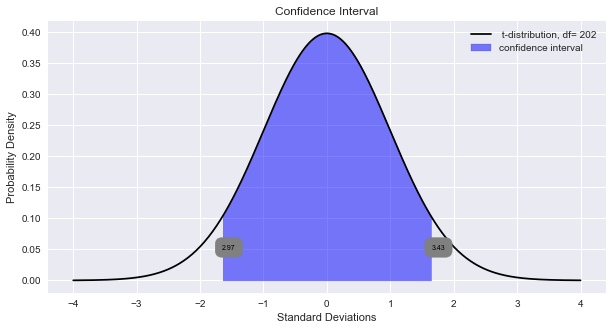

In [40]:
'''7.55 Exclusive relationships. A survey conducted on a reasonably random sample of 203 undergraduates
asked, among many other questions, about the number of exclusive relationships these students have been
in. The histogram below shows the distribution of the data from this sample. The sample average is 3.2
with a standard deviation of 1.97.
Estimate the average number of exclusive relationships Duke students have been in using a 90% confidence
interval and interpret this interval in context. Check any conditions required for inference, and note any
assumptions you must make as you proceed with your calculations and conclusions.'''

n = 203
xbar = 3.2
s = 1.97

cl = .90
sl = 1-cl
s1t = sl/2
dof = n-1

# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(10,5))
x = np.linspace(-4, 4, 500)
s1t = sl / 2
t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = s / np.sqrt(n)
me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
we're {cl:.0%} confident that the true average exclusive relationships of undergraduate Duke students
is {lo:.4f} between {hi:.4f}
'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,1,1)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='medium')

given data, looks pretty normal and randomly sampled. there are no evident outliers and there are too 
many samples within the data. there is a great opportunity to run hypothesis test. 
CONFIDENCE INTERVAL
standard error = 0.0634, me = 0.1244, dof = 5533, t_conf = 1.9604
we're 95% confident that the true average of first marriage age of US women
is 23.3156 between 23.5644



C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


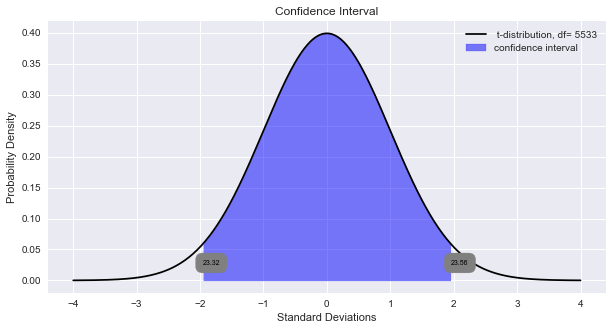

In [46]:
'''7.56 Age at first marriage, Part I. The National Survey of Family Growth conducted by the Centers
for Disease Control gathers information on family life, marriage and divorce, pregnancy, infertility, use of
contraception, and men's and women's health. One of the variables collected on this survey is the age at
first marriage. The histogram below shows the distribution of ages at first marriage of 5,534 randomly
sampled women between 2006 and 2010. The average age at first marriage among these women is 23.44 with
a standard deviation of 4.72.
Estimate the average age at first marriage of women using a 95% confidence interval, and interpret this
interval in context. Discuss any relevant assumptions.'''

print('''given data, looks pretty normal and randomly sampled. there are no evident outliers and there are too 
many samples within the data. there is a great opportunity to run hypothesis test. ''')
n = 5534
xbar = 23.44
s = 4.72

cl = .95
sl = 1-cl
s1t = sl/2
dof = n-1

# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(10,5))
x = np.linspace(-4, 4, 500)
s1t = sl / 2
t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = s / np.sqrt(n)
me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
we're {cl:.0%} confident that the true average of first marriage age of US women
is {lo:.4f} between {hi:.4f}
'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,1,1)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='medium')

In [53]:
'''7.57 Online communication. A study suggests that the average college student spends 10 hours per week
communicating with others online. You believe that this is an underestimate and decide to collect your own
sample for a hypothesis test. You randomly sample 60 students from your dorm and find that on average
they spent 13.5 hours a week communicating with others online. A friend of yours, who offers to help you
with the hypothesis test, comes up with the following set of hypotheses. Indicate any errors you see.
H0 : xbar < 10 hours
HA : xbar > 13:5 hours'''
print('''the hypotheses are wrong. there should be a equal sign rather than less than sign.
H0: xbar = 10 hours
HA: xbar != 10 hours
when you set the hypotheses like that and take your own research's point estimate, you conduct t-test
and based on the findings you can conclude whether there's an unusual difference between your own sample and
the study.
''')

the hypotheses are wrong. there should be a equal sign rather than less than sign.
H0: xbar = 10 hours
HA: xbar != 10 hours
when you set the hypotheses like that and take your own research's point estimate, you conduct t-test
and based on the findings you can conclude whether there's an unusual difference between your own sample and
the study.



In [52]:
'''7.58 Age at first marriage, Part II. Exercise 7.56 presents the results of a 2006 - 2010 survey showing that
the average age of women at first marriage is 23.44. Suppose a social scientist thinks this value has changed
since the survey was taken. Below is how she set up her hypotheses. Indicate any errors you see.
H0 : xbar != 23:44 years old
HA : xbar = 23:44 years old'''

print('''the hypotheses are wrong. there should be a equal sign rather than less than sign.
H0: xbar = 23.44 years old
HA: xbar != 23.44 years old
''')

the hypotheses are wrong. there should be a equal sign rather than less than sign.
H0: xbar = 23.44 years old
HA: xbar != 23.44 years old

